<a href="https://colab.research.google.com/github/PStettler/DSF-DCBP-Philip-Stettler/blob/main/projectGroup8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Notebook for DSF Project Group 8, Philip Stettler</h1>

<h3>getting startet, downloaded all these open source software </h3>

Putty from https://www.putty.org/
FileZilla from https://filezilla-project.org/


asked for access to UBELIX via: https://hpc-unibe-ch.github.io/

got access to Chemzilla directly from Sacha Javor, IP address and account and password shall not be mentionned here as this notebook is nopen to public.

aked for access to University super computer UBELIX via a ticket on: 
https://serviceportal.unibe.ch/sp?id=sc_cat_item&sys_id=1d137767db54141078ed3e48229619a7&tech=hpc

permission received on the same day:
You can now log in to UBELIX: 'ssh *campusAccount*@submit.unibe.ch'

looked at the beginner steps for UBELIX under https://hpc-unibe-ch.github.io//quick-start.html and ran a Hello_World job as described on the web-page.

<h2> Running a Hello World Job on UBELIX </h2>
I connected to the UBELIX cluster dierectly from the Chemzilla server.

Type: ssh "username"@submit.unibe.ch
you are then asked for the passwrd (the one for unibe account)

the connection can be terminated typing Ctrl + d

I first had to share the file first.sh with my directory at UBELIX. This, as well as the content of file first.sh is described under the quick-start link above. I ran into problems because I first created the first.sh file on my windows machine. But somehow, windows uses \r\n line breaks and linux uses \n lines breaks. So, I created the file on the linux powered Chemzilla server and shared it again with UBELIX, now named first2.sh. This worked.

The modified first2.sh files looked as followed:

In [ ]:
# #!/bin/bash
# #SBATCH --job-name="first job"
# #SBATCH --time=00:10:00
# #SBATCH --mem-per-cpu=1M
# #your code below this line
# module load Python
# srun python3 helloWorld.py

whereas the following python script was provided: (named helloWorld.py)

In [ ]:
# with open('helloWorld.txt', 'w') as file:
#   file.write('Hello World')

I submitted my first job to UBELIX by:

sbatch first2.sh

This job recieved batch number 24972121. 

After 10 minutes I checked on the status of my job with:

squeue --job=24972121

The job was not finished by then.

A couple hours later, the job was finshed and a file called helloWorld.txt was created.

<h2> Performing the lysozym tutorial for protein structure 2upj </h2>

lysozyme tutorial is found under: http://www.mdtutorials.com/gmx/

a pre cleaned file of the 2upj structure was provided by Sacha Javor via email.

The file was shared with Chemzilla using FileZilla (use Port 22 for connection). Doubble clicking on files shares them with the destination server.

Then, the tutorial was followed step by step until "production MD". The command line of GROMACS can be opened via Ctrl+Alt+T. All steps worked and no errors occured. The files are stored under Home of the group8 account. For the tutorial, multiple .mpd files had to be transferred to the server again via FileZilla. These files could be downloaded as plain text and were copied into the Windows Text editor and saved as .mdp files.

<h3>Figures created during tutorial:</h3>
All figures were created in R, as the GROMACS plot application was not yet working by the time I worked on the project.
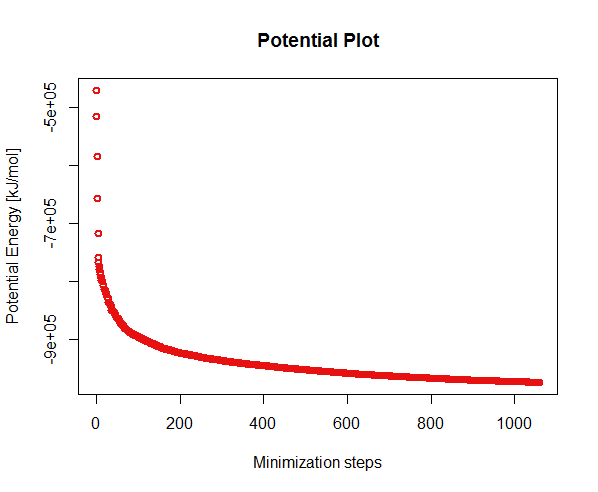

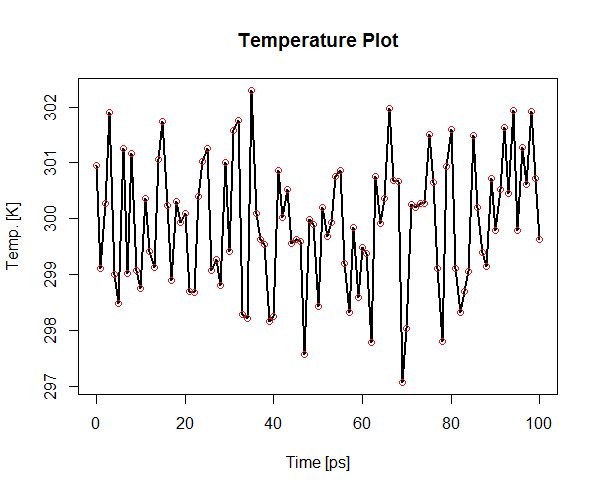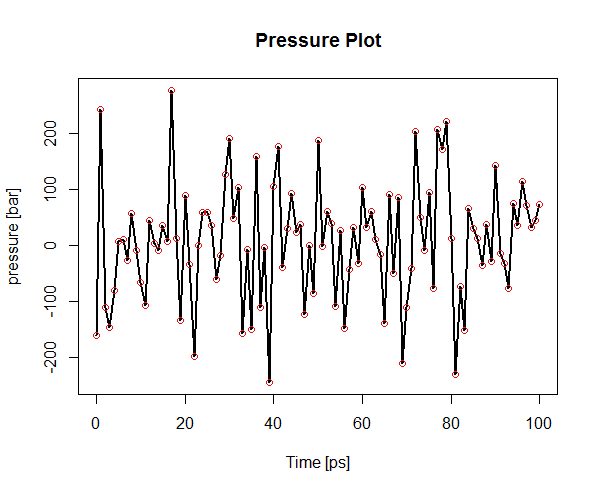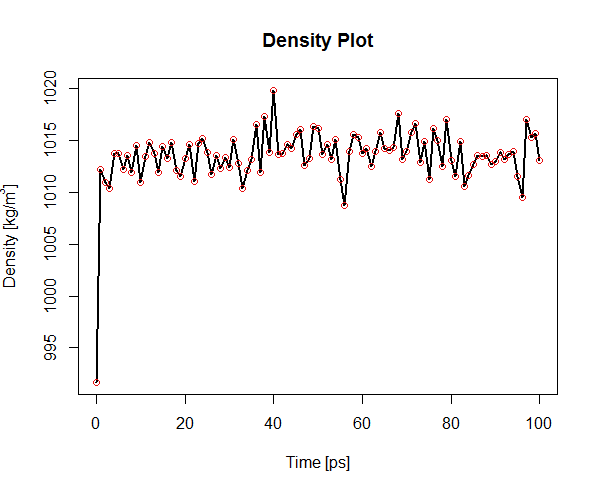

<h2>Running the production MD on UBELIX </h2>

to find the name of the GROMACS module on UBELIX I typed:

module avail GROMACS

this returned one finding: GROMACS/2020-foss-2019b

to load this module I typed:

module load GROMACS/2020-foss-2019b

to list all loaded modules:

module list

I tested if GROMACS is now actually running by typing

srun gmx help

this executed the help function of GROMACS correctly.

________________________________________________________________________________

The task is also to compare different partitions, namely epyc2 (which is default) and bdw. They can be specified as follow:

"The default partition is epyc2. To select another partition one must use the --partition option, e.g. --partition=gpu."

Now, I transferred the nvt.gro file to UBELIX and wrote the .sh job file:
  1. file, this uses partition default epyc2:



In [ ]:
#!/bin/bash
#SBATCH --job-name="epyc2"
#SBATCH --time=00:30:00
#SBATCH --mem-per-cpu=16G

# Your code below this line
module load GROMACS/2020-foss-2019b
srun gmx grompp -f DSF-MD-Prod4Ubelix.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr
srun gmx mdrun -deffnm md_0_1

  2. file, this uses partition bdw:

In [ ]:
#!/bin/bash
#SBATCH --job-name="bdw"
#SBATCH --time=00:30:00
#SBATCH --mem-per-cpu=16G
#SBATCH --partition=bdw

# Your code below this line
module load GROMACS/2020-foss-2019b
srun gmx grompp -f DSF-MD-Prod4Ubelix.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr
srun gmx mdrun -deffnm md_0_1